1) A paragraph describing what problem you decided to tackle and why you think it would be useful to have an ML model trained for that.

The goal of the this data analysis is checking the general trend in Visa applications, the most popular citizenships, employers, cities and finally, predicting the application decision based on the chosen features.
The reasons why we think it would be useful to have an ML model trained for that are:

We cannot code the rules: When rules depend on too many factors and many of these rules overlap or need to be tuned very finely, it soon becomes difficult for a human to accurately code the rules. We can use ML to effectively solve this problem.
We cannot scale this problem: ML solutions are effective at handling large-scale problems.
We need Representation + Evaluation + Optimization

2) A paragraph or two describing the dataset(s) you are going to use for that in your own words (do not give me the description header for the dataset -- I'll cry). If you have multiple datasets, describe how you are going to join them and what benefits you are expecting to gain by doing so.

According to Kaggle's dataset context, a permanent labor certification issued by the Department of Labor (DOL) allows an employer to hire a foreign worker to work permanently in the United States. In most instances, before the U.S. employer can submit an immigration petition to the Department of Homeland Security's U.S. Citizenship and Immigration Services (USCIS), the employer must obtain a certified labor certification application from the DOL's Employment and Training Administration (ETA). The DOL must certify to the USCIS that there are not sufficient U.S. workers able, willing, qualified and available to accept the job opportunity in the area of intended employment and that employment of the foreign worker will not adversely affect the wages and working conditions of similarly employed U.S. workers.
The dataset we are going to use includes
The employee’s personal information, like citizenship, wage, job title, education, work experience, etc.
The employer’s information, like office location, company type, etc.
Application information, such as submission date, case decision, etc.

3) Some preliminary analysis / plots / stats that you can provide at this point to illustrate interesting features of that data. These don't need to be complicated at this point. You can also tell us what type of data you're working with (numeric, nominal, text, images), how much missing data your dataset seems to have, etc.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('./us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])

In [32]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [33]:
df.tail()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN
374361,NaN,Phoenix,"Fragomen, Del Rey, Bernsen & Loewy, LLP",AZ,NaN,NaN,A-16279-59292,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"84,926.00","121,500.00",Year,NaN,NaN,NaN


In [34]:
print (len(df))

374362


There are total 374362 number of records and 154 features in this dataset. This dataset includes numeric and nominal values.

In [35]:
print ('Below is the list of features:')
print(df.columns.values)

Below is the list of features:
['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_complete

In [36]:
#check for missing data
features_missing_counts = pd.Series(0, index=list(df))
for feature in df:
    features_missing_counts[feature] = df[feature].isna().sum()
print ('Missing values for each feature:')
print (features_missing_counts)

Missing values for each feature:
add_these_pw_job_title_9089               332168
agent_city                                162908
agent_firm_name                           167365
agent_state                               166123
application_type                          239093
case_no                                   239093
case_number                               135269
case_received_date                        135271
case_status                                    0
class_of_admission                         22845
country_of_citizenship                     20633
country_of_citzenship                     353788
decision_date                                  0
employer_address_1                            42
employer_address_2                        149193
employer_city                                 14
employer_country                          135343
employer_decl_info_title                  135308
employer_name                                 12
employer_num_employees              

In [37]:
print (features_missing_counts.idxmax() + ': ' + str(features_missing_counts['orig_file_date']))

orig_file_date: 374081


orig_file_date has most missing values.

In [38]:
import numpy as np
petitionByEmployer=df.groupby('employer_name').size()
type(petitionByEmployer)
sortedPetitionByEmployer = petitionByEmployer.sort_values(ascending=False)

In [39]:
print ('Top 10 employer with petition:')
sortedPetitionByEmployer.head(10)                        

Top 10 employer with petition:


employer_name
COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    12081
MICROSOFT CORPORATION                             8369
INTEL CORPORATION                                 6564
GOOGLE INC.                                       5165
AMAZON CORPORATE LLC                              3719
INFOSYS LTD.                                      2717
CISCO SYSTEMS, INC.                               2634
ORACLE AMERICA, INC.                              2584
APPLE INC.                                        2583
QUALCOMM TECHNOLOGIES INC.                        1710
dtype: int64

4) Another paragraph describing what experiments you intend to run (are you going to train a regression model for this problem? a classifier? Or are you going to use clustering / association rules?

We will train a classifier using the data. We will try to classify the data into two categories: CERTIFIED and DENIED. We will first clean up the data. For example, for field “case_status”, we will merge values “CERTIFIED” and “CERTIFIED-EXPIRED” into category CERTIFIED, and ignore records where “case_status” is “WITHDRAWN”.

5) One or two closing statements describing how you intend for people to benefit from your "intelligent application". For instance, if you are developing a predictive model to flag parachutes that may be defective, you could tell me here that skydiving companies could use your application to help them flag which of their equipment is in need of attention. Perhaps they can capture certain features about each of their parachutes and pass those to your model via some kind of user interface, and in response to that they would get a "score" that immediately tells them what the likelihood of that being a defective parachute is.

People can use the classifier to predict whether their permanent visa application will be approved or denied. They just need to pass in some data about their case such as country of citizenship, visa type, etc.


In [40]:
casenoindex = df.columns.get_loc("case_no")
casenumberindex = df.columns.get_loc("case_number")
casenumberlist = []

for value in df.iloc[0:135269,casenoindex]:
    casenumberlist.append(value)
    
for value in df.iloc[135269:374363,casenumberindex]:
    casenumberlist.append(value)
    
df['casenumber'] = casenumberlist
df.drop(df.columns[[casenoindex,casenumberindex]], axis=1, inplace=True)

In [41]:
#Printing number of unique values for 'case_status' column
for value in df.case_status.unique():
    print(len(df[df['case_status'] == value])," occurrences of status '{}'".format(value))

181933  occurrences of status 'Certified'
25649  occurrences of status 'Denied'
148586  occurrences of status 'Certified-Expired'
18194  occurrences of status 'Withdrawn'


In [42]:
#Removing all withdrawn applications
df = df[df.case_status != 'Withdrawn']

#Combining certified-expired and certified applications and displaying distribution of "case_status" variable
df.loc[df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df.case_status.value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

In [43]:
#Dropping all empty columns
df = df.dropna(axis=1, how='all');

#Dropping all empty rows
df = df.dropna(axis=0, how='all');

df.shape

(356168, 153)

In [54]:
# Displaying 15 most popular cities
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].value_counts().head(15)

NEW YORK           17198
COLLEGE STATION    11985
SANTA CLARA        10519
SAN JOSE            9147
REDMOND             8485
MOUNTAIN VIEW       8121
HOUSTON             6720
SAN FRANCISCO       6352
SUNNYVALE           6104
PLANO               5607
CHICAGO             5561
SEATTLE             5051
EDISON              4056
LOS ANGELES         4045
SAN DIEGO           3702
Name: employer_city, dtype: int64

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Employer city')]

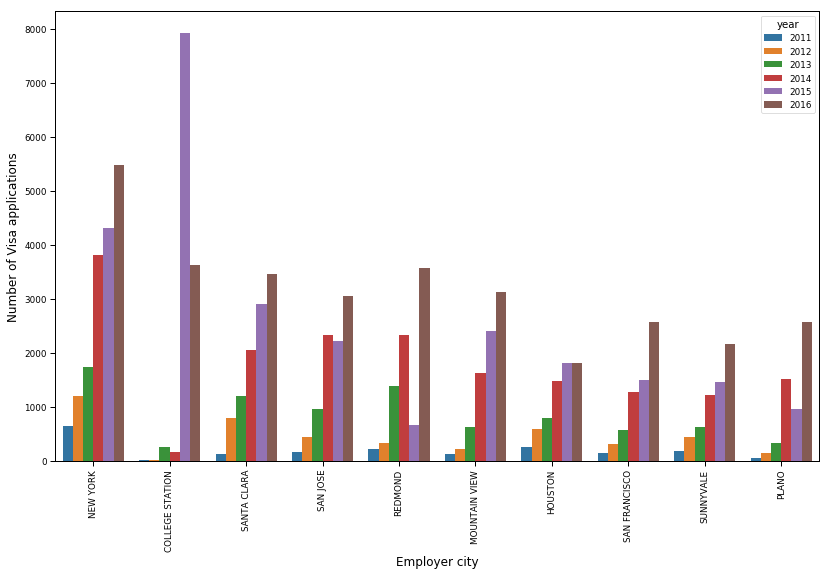

In [55]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_city', hue='year', data=df, order=df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Employer name')]

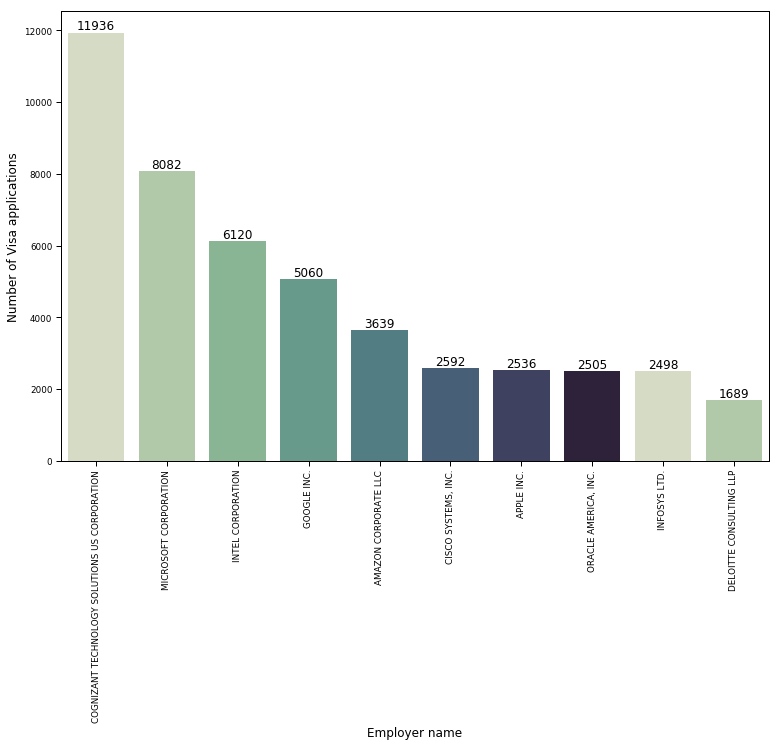

In [49]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12,"axes.labelsize":13})
sns.countplot(x='employer_name', data=df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=df.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "employer_name" column and displaying counts above bars 
for i, v in df.employer_name.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.employer_name,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

It is obviously that IT companies have most Visa applications. This makes us assume that IT industry is the most demanding one in United States.

In [50]:
#Converting values to lower case
df['job_info_job_title'] = df['job_info_job_title'].str.lower()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

software engineer                18582
computer systems analyst         12054
senior software engineer          5802
software developer                4501
programmer analyst                3763
assistant professor               2869
software development engineer     2766
systems analyst                   2587
senior programmer analyst         1884
senior software developer         1625
Name: job_info_job_title, dtype: int64

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Job Title')]

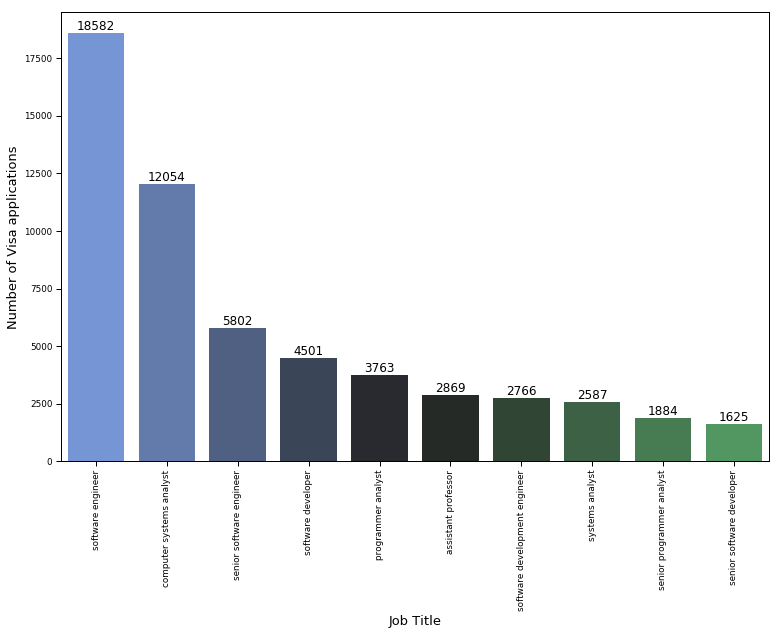

In [51]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='job_info_job_title',data=df, 
               palette = sns.diverging_palette(255, 133, l=60, n=10, center="dark"), 
               order=df.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "job_info_job_title" column and displaying counts above bars 
for i, v in df.job_info_job_title.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.job_info_job_title,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

From the plot, we can see that Software engineer is the job title which has the most visa applicaitons.

[Text(0,0.5,'Number of Visa applications'),
 Text(0.5,0,'Country of citizenship')]

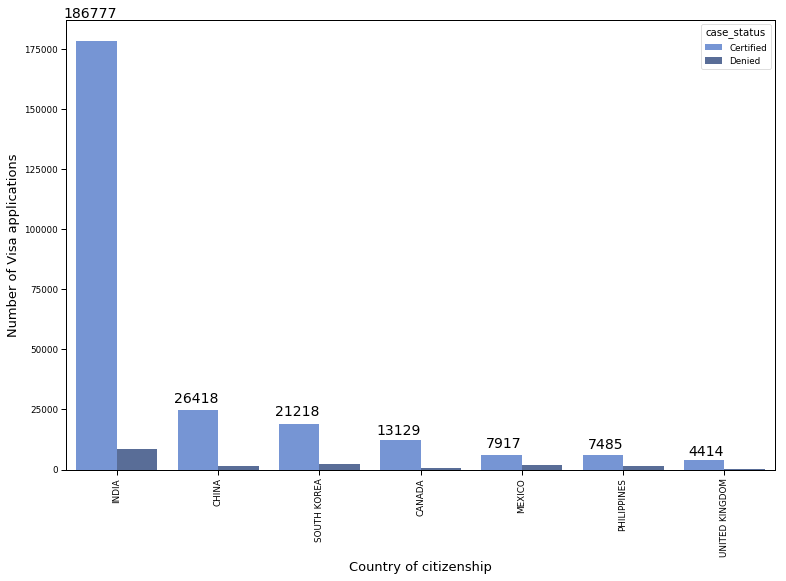

In [52]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='country_of_citizenship',hue='case_status',data=df, 
              palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark"), 
              order=df.country_of_citizenship.value_counts().iloc[:7].index)
plt.xticks(rotation=90)

#Iterating over elements in "country_of_citizenship" column and displaying counts above bars 
for i, v in df.country_of_citizenship.value_counts().head(7).reset_index().iterrows():
    ax.text(i,v.country_of_citizenship,v.unique()[1], horizontalalignment='right',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Country of citizenship', ylabel='Number of Visa applications')

We can see that India has the most visa applications. We can assume most of them are IT specialists.

[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Visa type')]

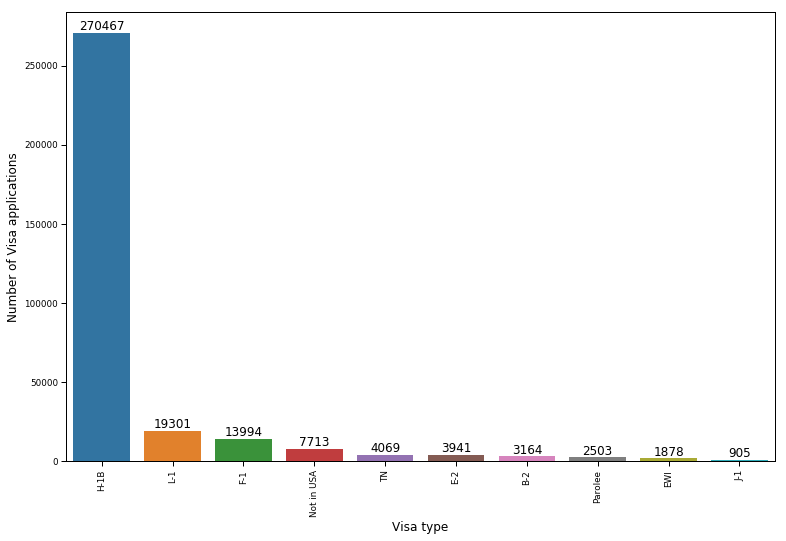

In [63]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.countplot(x='class_of_admission',data=df, 
              order=df.class_of_admission.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "class_of_admission" column and displaying counts above bars 
for i, v in df.class_of_admission.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.class_of_admission,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Visa type', ylabel='Number of Visa applications')

Between thses visa applications, H-1B is the most one.

In [72]:
#Dividing our continuous income values into some categories to facilitate their visualization
df['remuneration'] = pd.cut(df['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = df['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k        19810
30-60k       47493
60-90k      133050
90-120k     112631
120-150k     30532
150-180k      7094
180-210k      3801
210-240k       604
240-270k        29
270k+         1123
Name: remuneration, dtype: int64

/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


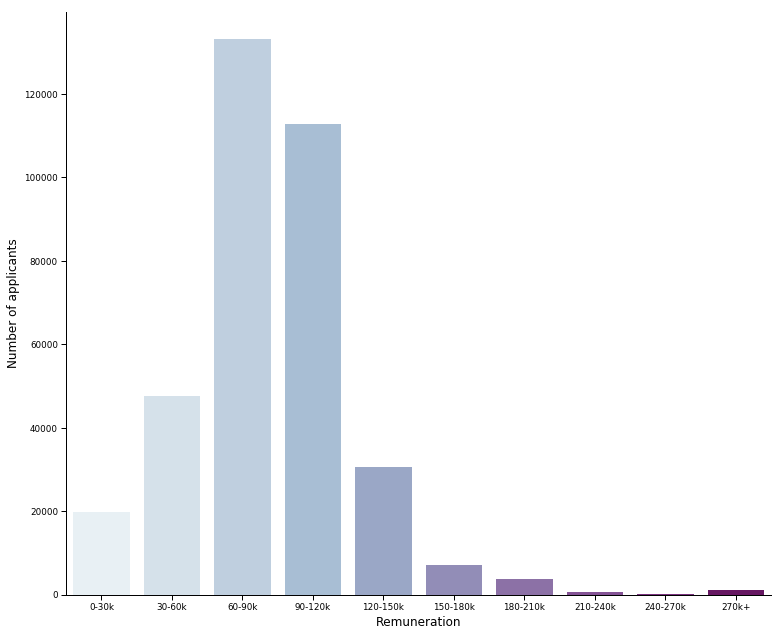

In [73]:
# Draw a count plot to show the distribution of remunerations
g = sns.factorplot(x='remuneration', data=df, kind="count",
                   palette="BuPu", size=9, aspect=1.2)

g.set(xlabel='Remuneration', ylabel='Number of applicants')

More than 65% applicants earn between 60K - 120K, we can assume this is the average salary for IT workers.